# Book Recommendation

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

filepath = os.path.join(os.getcwd(), 'data', 'books', 'BX-Book-Ratings.csv')
ratings = pd.read_csv(filepath, delimiter = ';', escapechar='\\')
ratings.columns = ['UserId', 'ISBN', 'Rating']
ratings = ratings.loc[ratings.Rating != 0]
ratings.head()

,UserId,ISBN,Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


(array([      0.,  129621.,   26261.,   10173.,    5383.,    3275.,
           2134.,    1497.,    1147.,    1519.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

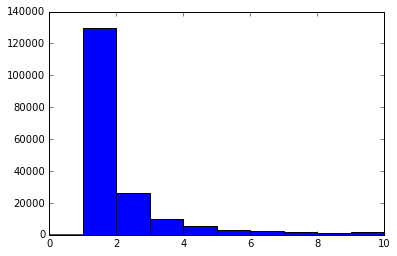

In [3]:
ISBNCounts = ratings.groupby('ISBN').count()

plt.hist(ISBNCounts.UserId, range = [0, 10], align = 'mid')

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
UserId    433671 non-null int64
ISBN      433671 non-null object
Rating    433671 non-null int64
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


In [5]:
print ('{} unique UserIds in range [{}, {}]'.format(
        ratings.UserId.unique().shape[0], ratings.UserId.min(), ratings.UserId.max()))

77805 unique UserIds in range [8, 278854]


In [6]:
print ('{} unique books'.format(ratings.ISBN.unique().shape[0]))

185973 unique books


In [7]:
ratings.Rating.value_counts()

8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Rating, dtype: int64

In [8]:
users = pd.DataFrame({'UserId': list(np.sort(ratings.UserId.unique())), 'UserIndex': range(ratings.UserId.unique().shape[0])})
users.set_index('UserId', inplace = True)
users.head()

,UserIndex
UserId,
8,0
9,1
10,2
12,3
14,4


In [9]:
books = pd.DataFrame({'ISBN': list(np.sort(ratings.ISBN.unique())), 'BookIndex': range(ratings.ISBN.unique().shape[0])})
books.set_index('ISBN', inplace = True)
books.head()

,BookIndex
ISBN,
0330299891,0
0375404120,1
9022906116,2
"""0094749809",3
"""0210000010",4


In [17]:
records = pd.DataFrame({'ISBN': list(np.sort(ratings.ISBN.unique())), 'BookIndex': range(ratings.ISBN.unique().shape[0])}).to_dict('record')
{ each['ISBN']: each['BookIndex'] for each in records }

{'0140431357': 14592,
 '0965916480': 131672,
 '0520006534': 68842,
 '3446133003': 160442,
 '0966726928': 131824,
 '0449502147': 60784,
 '078621418X': 106488,
 '0887299253': 124710,
 '0708831478': 94885,
 '081671469X': 114711,
 '0670894710': 82247,
 '9516439691': 182912,
 '1893732290': 150298,
 '0155067664': 16898,
 '1865155128': 148076,
 '0486211339': 65782,
 '0571216455': 76622,
 '1561794597': 137300,
 '0373761899': 37166,
 '0521436257': 69086,
 '0312199406': 22446,
 '1879371588': 148695,
 '0821761994': 115867,
 '0486268780': 66014,
 '0590568833': 79400,
 '667241688': 168166,
 '0752826824': 101667,
 '0062514547': 7496,
 '0590453858': 78820,
 '0751512370': 101197,
 '0099416883': 9711,
 '0764531964': 103589,
 '0553584510': 75719,
 '038089582X': 42628,
 '0458804800': 65131,
 '0099981106': 10295,
 '0812090381': 112712,
 '1864489316': 147968,
 '0765190591': 103818,
 '084782117X': 118922,
 '0553574833': 75226,
 '0756400120': 102184,
 '0679775439': 90146,
 '0893662739': 125883,
 '1842750240'

In [256]:
ratings = ratings.join(books, 'ISBN').join(users, 'UserId')

In [257]:
import scipy.sparse as sparse

row = ratings.BookIndex
col = ratings.UserIndex
data = ratings.Rating

R = sparse.coo_matrix((data, (row, col)))
R.shape

(185973, 77805)

In [258]:
float(R.nonzero()[0].shape[0]) * 100 / (R.shape[0] * R.shape[1])

0.002997112034162404

In [259]:
from sklearn.decomposition import TruncatedSVD

#bookSVD = TruncatedSVD(100)
#B = bookSVD.fit_transform(R)
B = R
B.shape

(185973, 77805)

In [267]:
import os
filepath = os.path.join(os.getcwd(), 'data', 'books', 'BX-Books.csv')

bookData = pd.read_csv(filepath, delimiter=';', escapechar='\\')
bookData.set_index('ISBN', inplace = True)
bookData.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,
0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [271]:
len(bookData)

271379

In [261]:
ratings.groupby('ISBN').count().sort_values(by = 'UserId', ascending = False).join(bookData).head(n = 10)

,UserId,Rating,BookIndex,UserIndex,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,,,,,
0316666343,707,707,707,707,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
0971880107,581,581,581,581,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
0385504209,487,487,487,487,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
0312195516,383,383,383,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
0679781587,333,333,333,333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060928336,320,320,320,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
059035342X,313,313,313,313,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
0142001740,307,307,307,307,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
0446672211,295,295,295,295,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...


In [277]:
ratings.join(bookData, 'ISBN').groupby(['Book-Title', 'BookIndex']).size().sort_values(ascending=False)[:50]

Book-Title                                                                 BookIndex
The Lovely Bones: A Novel                                                  26378        707
Wild Animus                                                                132534       581
The Da Vinci Code                                                          44961        487
The Red Tent (Bestselling Backlist)                                        22405        383
Divine Secrets of the Ya-Ya Sisterhood: A Novel                            5269         320
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))           77942        313
The Secret Life of Bees                                                    15990        307
Where the Heart Is (Oprah's Book Club (Paperback))                         58853        295
A Painted House                                                            54839        281
Girl with a Pearl Earring                                                  64940       

In [278]:
from sklearn.metrics.pairwise import cosine_similarity

# Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
# Index = 77942

similarIndices = list(cosine_similarity(np.matrix(B.tocsr()[26496].todense()), B).argsort().ravel())[::-1][:25]


In [279]:
similarIndices

[26496,
 82135,
 15146,
 71890,
 14797,
 14238,
 8027,
 24233,
 18179,
 31872,
 60926,
 3767,
 77714,
 39461,
 1745,
 47437,
 63922,
 13235,
 57050,
 71957,
 21862,
 26098,
 89538,
 25997,
 72117]

In [280]:
books.join(bookData).set_index('BookIndex').iloc[similarIndices].dropna(axis = 0)

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
BookIndex,,,,,,,
26496,The Catcher in the Rye,J.D. Salinger,1991.0,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...,http://images.amazon.com/images/P/0316769487.0...
82135,Before the Wind: The Memoir of an American Sea...,Charles Tyng,1999.0,Penguin USA,http://images.amazon.com/images/P/0670886327.0...,http://images.amazon.com/images/P/0670886327.0...,http://images.amazon.com/images/P/0670886327.0...
15146,Rumpelstiltskin: From the German of the Brothe...,Paul O. Zelinsky,1996.0,Puffin Books,http://images.amazon.com/images/P/0140558640.0...,http://images.amazon.com/images/P/0140558640.0...,http://images.amazon.com/images/P/0140558640.0...
71890,Anne of Avonlea,Lucy Maud Montgomery,1981.0,Bantam Books,http://images.amazon.com/images/P/0553206001.0...,http://images.amazon.com/images/P/0553206001.0...,http://images.amazon.com/images/P/0553206001.0...
14797,Upanishads (Penguin Classics),Juan Mascaro,1965.0,Penguin Books,http://images.amazon.com/images/P/0140441638.0...,http://images.amazon.com/images/P/0140441638.0...,http://images.amazon.com/images/P/0140441638.0...
14238,Jo's Boys (Puffin Classics),Louisa May Alcott,1996.0,Puffin Books,http://images.amazon.com/images/P/0140367144.0...,http://images.amazon.com/images/P/0140367144.0...,http://images.amazon.com/images/P/0140367144.0...
8027,Donde viven los monstruos,Maurice Sendak,1996.0,Rayo,http://images.amazon.com/images/P/0064434222.0...,http://images.amazon.com/images/P/0064434222.0...,http://images.amazon.com/images/P/0064434222.0...
24233,Starlight 3 (Starlight),Patrick Nielsen Hayden,2001.0,Tor Books,http://images.amazon.com/images/P/0312867808.0...,http://images.amazon.com/images/P/0312867808.0...,http://images.amazon.com/images/P/0312867808.0...
18179,The New York Public Library's Books of the Cen...,Elizabeth Diefendorf,1997.0,Oxford University Press,http://images.amazon.com/images/P/0195117905.0...,http://images.amazon.com/images/P/0195117905.0...,http://images.amazon.com/images/P/0195117905.0...
